In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
def fetch_bank_marketting_ds():
    from sklearn.datasets import  fetch_openml
    
    openml_ds = fetch_openml(data_id=1461, as_frame=True, parser='pandas')
    name_mapping = {
        'V1': 'age',
        'V2': 'job',
        'V3': 'marital_status',
        'V4': 'education',
        'V5': 'credit_in_default',
        'V6': 'avg_yearly_balance',
        'V7': 'has_housing_loan',
        'V8': 'has_personal_loan',
        'V9': 'contact_type',
        'V10': 'last contact day',
        'V11': 'last contact month',
        'V12': 'Duration',
        'V13': 'campaign',
        'V14': 'number_of_days_passed',
        'V15': 'number_of_contacts_performed_before',
        'V16': 'outcome_of_the_previous_marketing_campaign',
        'Class': 'target'
    }
    dataset = openml_ds['frame']
    dataset.rename(columns=name_mapping, inplace=True)
    dataset['target'] = dataset['target'].apply(lambda x: 'YES' if x=='1' else 'NO')
    dataset.replace(to_replace='unknown', value=np.nan, inplace=True)
    #dataset.head()
    return dataset

In [3]:
#pprint(openml_ds['DESCR'])

In [4]:
dataset = fetch_bank_marketting_ds()

dataset.head()

,age,job,marital_status,education,credit_in_default,avg_yearly_balance,has_housing_loan,has_personal_loan,contact_type,last contact day,last contact month,Duration,campaign,number_of_days_passed,number_of_contacts_performed_before,outcome_of_the_previous_marketing_campaign,target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,YES
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,YES
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,YES
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,YES
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,YES


<Axes: xlabel='contact_type'>

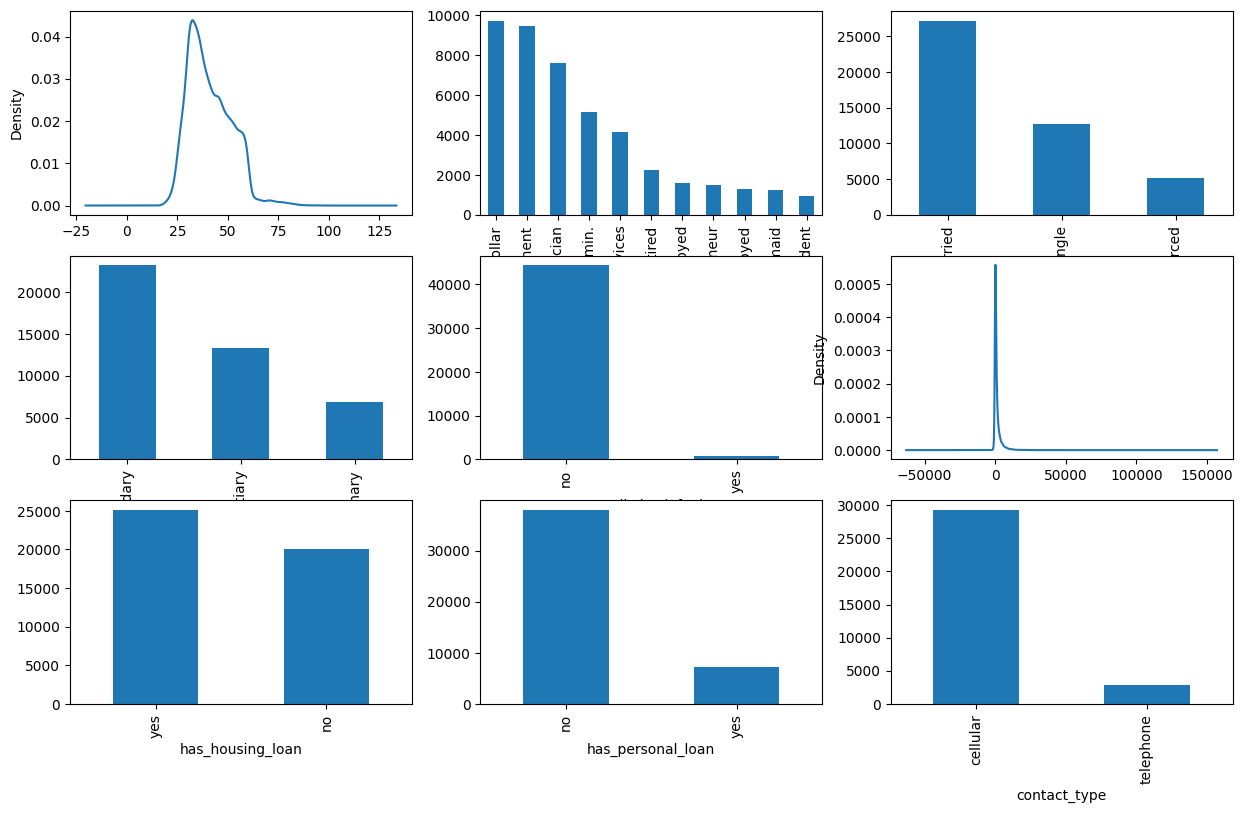

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 9))

dataset['age'].plot(kind='kde',ax=axes[0][0]) 
dataset['job'].value_counts().plot(kind='bar',ax=axes[0][1]) 
dataset['marital_status'].value_counts().plot(kind='bar',ax=axes[0][2])

dataset['education'].value_counts().plot(kind='bar', ax=axes[1][0]) 
dataset['credit_in_default'].value_counts().plot(kind='bar', ax=axes[1][1]) 
dataset['avg_yearly_balance'].plot(kind='kde', ax=axes[1][2]) 

dataset['has_housing_loan'].value_counts().plot(kind='bar', ax=axes[2][0]) 
dataset['has_personal_loan'].value_counts().plot(kind='bar', ax=axes[2][1]) 
dataset['contact_type'].value_counts().plot(kind='bar', ax=axes[2][2]) 

<Axes: xlabel='target'>

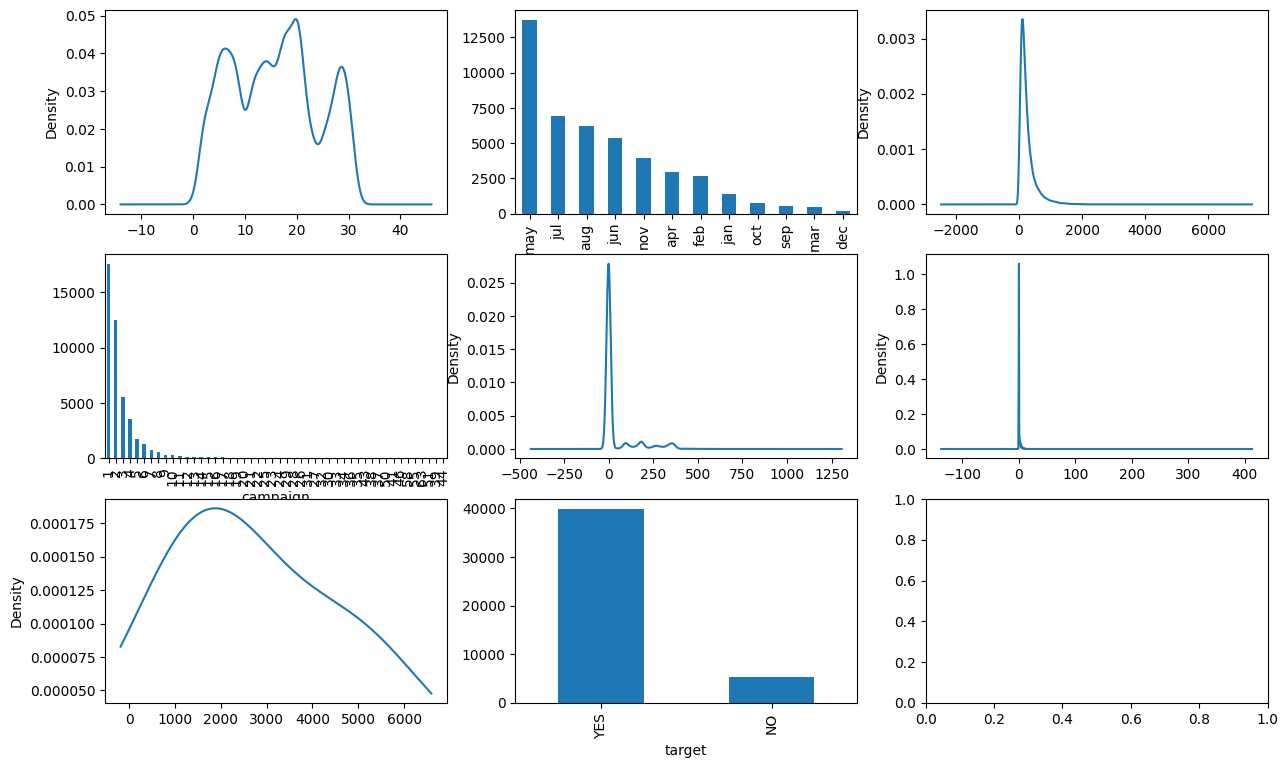

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 9))

dataset['last contact day'].plot(kind='kde',ax=axes[0][0]) 
dataset['last contact month'].value_counts().plot(kind='bar',ax=axes[0][1]) 
dataset['Duration'].plot(kind='kde',ax=axes[0][2])

dataset['campaign'].value_counts().plot(kind='bar', ax=axes[1][0]) 
dataset['number_of_days_passed'].plot(kind='kde', ax=axes[1][1]) 
dataset['number_of_contacts_performed_before'].plot(kind='kde', ax=axes[1][2]) 

dataset['outcome_of_the_previous_marketing_campaign'].value_counts().plot(kind='kde', ax=axes[2][0]) 
dataset['target'].value_counts().plot(kind='bar', ax=axes[2][1]) 


In [7]:
dataset.isna().sum()

age                                               0
job                                             288
marital_status                                    0
education                                      1857
credit_in_default                                 0
avg_yearly_balance                                0
has_housing_loan                                  0
has_personal_loan                                 0
contact_type                                  13020
last contact day                                  0
last contact month                                0
Duration                                          0
campaign                                          0
number_of_days_passed                             0
number_of_contacts_performed_before               0
outcome_of_the_previous_marketing_campaign    36959
target                                            0
dtype: int64

In [8]:
dataset[dataset.duplicated()]

,age,job,marital_status,education,credit_in_default,avg_yearly_balance,has_housing_loan,has_personal_loan,contact_type,last contact day,last contact month,Duration,campaign,number_of_days_passed,number_of_contacts_performed_before,outcome_of_the_previous_marketing_campaign,target


In [9]:
dataset['target'].value_counts()

target
YES    39922
NO      5289
Name: count, dtype: int64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   age                                         45211 non-null  int64   
 1   job                                         44923 non-null  category
 2   marital_status                              45211 non-null  category
 3   education                                   43354 non-null  category
 4   credit_in_default                           45211 non-null  category
 5   avg_yearly_balance                          45211 non-null  int64   
 6   has_housing_loan                            45211 non-null  category
 7   has_personal_loan                           45211 non-null  category
 8   contact_type                                32191 non-null  category
 9   last contact day                            45211 non-null  int64   
 10

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as column_selector
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
#from mlxtend.feature_selection import ColumnSelector

from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

import numpy as np

from sklearn.neighbors import KNeighborsClassifier

In [12]:
# dataset['bool_col']  = np.array(40000*[True] + 5211* [False])

In [13]:
transformer_n = Pipeline(
    steps=[("imputer_n", SimpleImputer(strategy="mean")), 
           ("scaler_n", StandardScaler())],
    verbose = 10
)

transformer_c = Pipeline(
    steps=[
        ("imputer_c", SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ("encoder_c", OneHotEncoder(handle_unknown="infrequent_if_exist", 
                                    drop='if_binary',
                                    sparse_output=False, 
                                    dtype=np.int8)
        ),
    ],
    verbose = 10
)

def bool_to_number(x: np.ndarray) -> np.ndarray:
    return np.multiply(x, 1)

BooleanTransformer = FunctionTransformer(bool_to_number, feature_names_out = 'one-to-one')

transformer_b = Pipeline(
    steps=[("to_int", BooleanTransformer), 
           ("imputer_c", SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
          ],
    verbose = 10
)

preprocessor = ColumnTransformer(
    transformers=[
        ("transformer_n", transformer_n, column_selector(dtype_include=[np.number]) ),
        ("transformer_c", transformer_c, column_selector(dtype_include=["category"]) ),
        ("transformer_b", transformer_b, column_selector(dtype_include=[bool]) ),
    ],
    n_jobs = -1,
    remainder='drop',
    verbose_feature_names_out=False,
    verbose=10
).set_output(transform='pandas')

dataset_trf = preprocessor.fit_transform(dataset)


print(dataset_trf.shape)
dataset_trf.head()

(45211, 44)


,age,avg_yearly_balance,last contact day,Duration,campaign,number_of_days_passed,number_of_contacts_performed_before,job_admin.,job_blue-collar,job_entrepreneur,...,last contact month_jun,last contact month_mar,last contact month_may,last contact month_nov,last contact month_oct,last contact month_sep,outcome_of_the_previous_marketing_campaign_failure,outcome_of_the_previous_marketing_campaign_other,outcome_of_the_previous_marketing_campaign_success,target_YES
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [14]:
from sklearn.ensemble import RandomForestClassifier

model_pipeline = Pipeline(
    steps=[("transformer", preprocessor ), 
           ("estimator", RandomForestClassifier(n_jobs=-1))
          ],
    verbose = True
)

In [15]:
target = dataset.pop('target')

print(dataset.shape, target.shape)

(45211, 16) (45211,)


In [16]:
model_pipeline.fit(dataset,target)

[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.8s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   1.3s


Pipeline(steps=[('transformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('transformer_n',
                                                  Pipeline(steps=[('imputer_n',
                                                                   SimpleImputer()),
                                                                  ('scaler_n',
                                                                   StandardScaler())],
                                                           verbose=10),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018FFED41250>),
                                                 ('transformer_c',
                                                  Pipeline(steps=[('imputer_c',
                                                                   SimpleImputer(strategy='most_frequent')...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function bool_to_number at 0x0000018FFED3AAF0>)),
                                                                  ('imputer_c',
                                                                   SimpleImputer(strategy='most_frequent'))],
                                                           verbose=10),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018FFED410A0>)],
                                   verbose=10,
                                   verbose_feature_names_out=False)),
                ('estimator', RandomForestClassifier(n_jobs=-1))],
         verbose=True)

In [19]:
model_pipeline.named_steps.get('estimator', None)

RandomForestClassifier(n_jobs=-1)